In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!mkdir credit_scoring_model
%cd credit_scoring_model

C:\Users\saini\Downloads\credit_scoring_model


C:\Users\saini\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       151
           1       0.49      0.51      0.50       149

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300

Confusion Matrix:


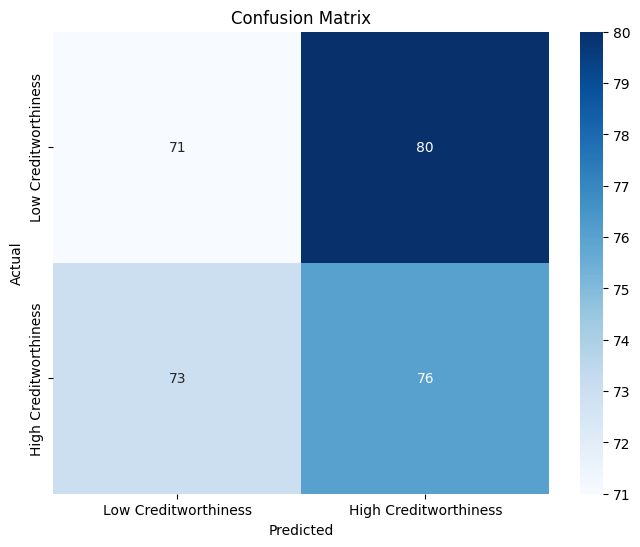

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Synthetic Data (For demonstration purposes)
# Replace this with real-world data if available
np.random.seed(42)
data_size = 1000
X = pd.DataFrame({
    'Income': np.random.normal(50000, 15000, data_size),
    'Age': np.random.randint(18, 70, data_size),
    'Credit_Score': np.random.normal(650, 50, data_size),
    'Loan_Amount': np.random.normal(20000, 5000, data_size),
    'Existing_Debt': np.random.normal(5000, 2000, data_size)
})
y = np.random.choice([0, 1], size=data_size)  # 0: Low Creditworthiness, 1: High Creditworthiness

# Display first few rows of the dataset
X.head(), pd.Series(y).value_counts()

# Split Dataset into Features and Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Creditworthiness', 'High Creditworthiness'], 
            yticklabels=['Low Creditworthiness', 'High Creditworthiness'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()